# LSN 9

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

# Exercise 9.1

## Assigment

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

# Data Structure

Firstly, I need to define my problem in terms of data structure. I opted for a c++ class implementation with 3 classes:

- `class Chromosome`: it contains a single solution, i.e. a set of genes, each representing a city $\in[1,34]$. The first city is locked to be 1. The chromosome itself is an `arma::vec` of size 34 + 1: there is an additional gene which is locked to be equal to the first one in order to fullfill the round trip constraint.

- `class Generation`: this class is the most important and contains all the operators which are needed for the evolution of the solutions. The principal data member if `m_gene_pool` which contains all of the current solutions (chromosomes).

- `class GeneticAlgorithm`: this class manages the evolution, the initializations and the I/0 handling.

Then, a `main.cpp` file starts the program and takes in input parameters through a `input.in` file.

**Please note that everything was implemented using as many `armadillo` primitives as possible, resulting in a remarkable speed enhancement.**

# Scheme

1. Initialize the program and create a set of `m_M` random chromosomes, each representing an admissable (roundtrip constraint, each city visited once constraint) path. Create a set of `34` cities distributed randomly either inside a square or on a circle.
2. Compute for each initial solution the corresponding fitness and sort them accordingly.
3. Select a pair of chromosomes through a `Selection()` operator. Carry out a crossover thorugh a `CrossOver()` operator with probability $> 50\%$. If the crossover doesn't take place, just create an identical pair of chromosomes as siblings.
4. Apply mutations to the siblings thorugh a `Mutations()` operator with adequate probabilities.
5. Store the set of new chromosomes in a `m_new_generation` `arma::mat`
6. Repeat points 3.-5. `m_M/2` times.
7. Replace the `m_generation` matrix with `m_new_generation`. Computed fitness values and sort chromosomes accordingly.
8. Repeat points 3.-7. a number `NumberOfGenerations` times.

# Operators

At the heart of my genetic algorithm lie the operators, 3 fuctions which update the pool of chromosomes stochastically with the aim of lowering their relative cost function ($L^{(2)}$).

- The `Selection()` algorithm selects a pair of chromosome to cross and it is implemented as a loaded die which tends to prefer chromosomes with higher fitness. 
```c++ 
int Selection() {return int(m_M * pow(m_rnd->Rannyu(), m_p));};
```
By tuning the exponent `m_p` which is given as input through `input.in`, the program is able of exploring a higher portion of solutions or just the best ones.

- The `Mutations()` operators applies the for abovementioned mutations with each probability being $p_{m_i}<10\%$
- The `CrossOver()` operators applies the crossover to the selected "mom" and "dad" solutions with $p_c>50\%$

# Results

## Parameters tuning

- Relatively to the size of the solutions pool and the number of generations, by considering a speed/correctednes balance, I emperically opted for **m_M** = $10^4$ and **NumberOfGenerations** = $1.5\cdot10^3$ which is largely enough.

- In terms of probabilities, the following plot shows a comparison with different probabilities for $<L^{(2)}>$ computed over the best half of the solutions:

In [784]:
import numpy as np
import matplotlib.pyplot as plt

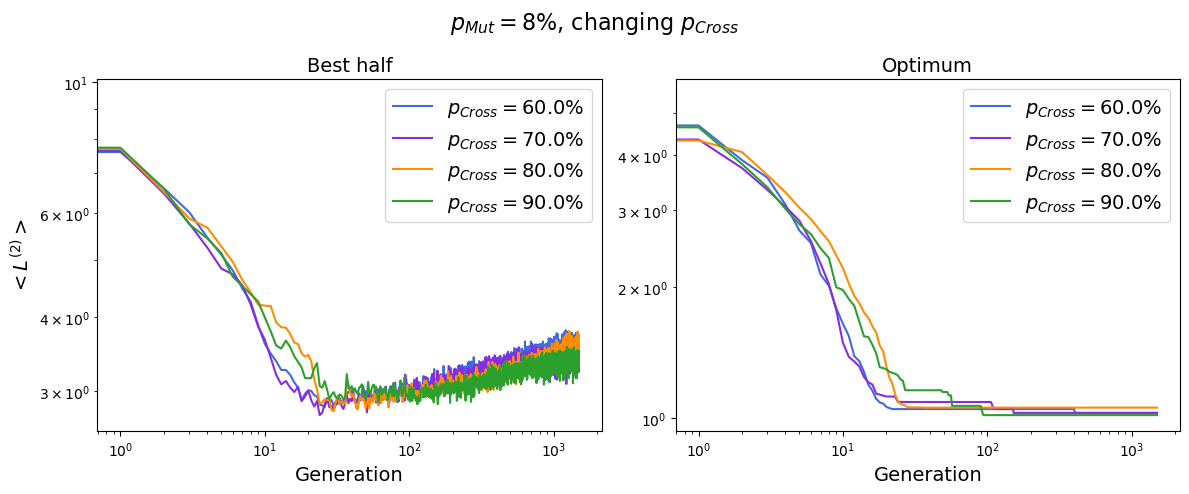

In [668]:
plt.figure(figsize=(12,5))

colors =['royalblue', 'blueviolet', 'darkorange', 'tab:green']

plt.subplot(1,2,1)
h=0
for i in [0.6,0.7,0.8,0.9]:
    filename = f'./9.1/resultsSquare{i}.0.08.txt'
    loss = np.loadtxt(filename, usecols=(0))
    labelstring = '$p_{Cross}=$'+f'{i*100}%'
    plt.plot(loss, label=labelstring, color=colors[h])
    h+=1
    
plt.xlabel('Generation', fontsize=14)
plt.ylabel('$<L^{(2)}>$', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.title('Best half', fontsize=14)
plt.legend(fontsize=14)

plt.subplot(1,2,2)
h=0
for i in [0.6,0.7,0.8,0.9]:
    filename = f'./9.1/optimumLoss{i}.0.08.txt'
    loss = np.loadtxt(filename, usecols=(0,1))
    labelstring = '$p_{Cross}=$'+f'{i*100}%'
    plt.plot(loss[:,1], label=labelstring, color=colors[h])
    h+=1
    
plt.xlabel('Generation', fontsize=14)
plt.title('Optimum', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=14)

plt.suptitle('$p_{Mut}=8\%$, changing $p_{Cross}$', fontsize=16)

plt.tight_layout()
plt.show()

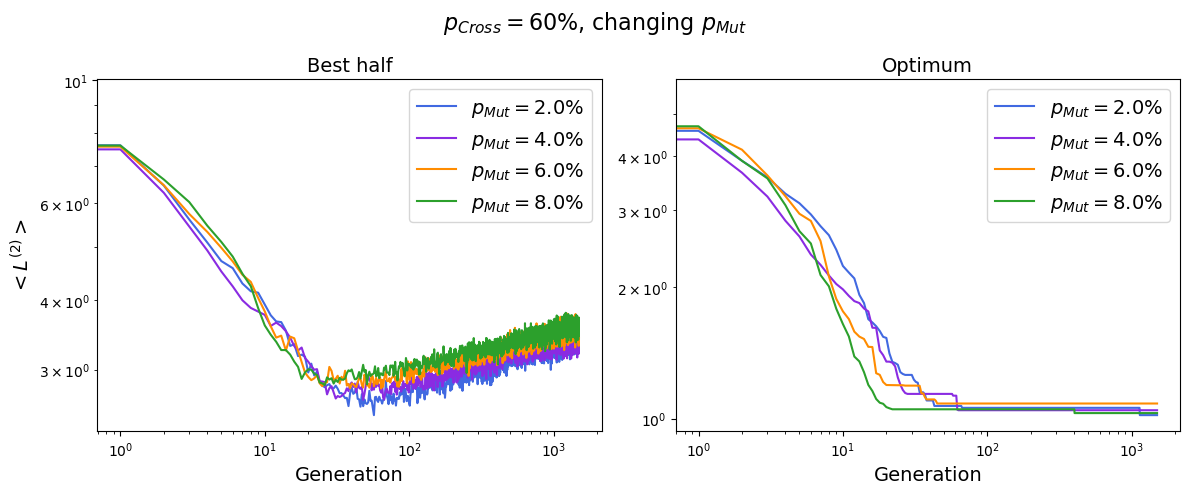

In [667]:
plt.figure(figsize=(12,5))

colors =['royalblue', 'blueviolet', 'darkorange', 'tab:green']

plt.subplot(1,2,1)
h=0
for i in [0.02,0.04,0.06,0.08]:
    filename = f'./9.1/resultsSquare0.6.{i}.txt'
    loss = np.loadtxt(filename, usecols=(0))
    labelstring = '$p_{Mut}=$'+f'{i*100}%'
    plt.plot(loss, label=labelstring, color=colors[h])
    h+=1
    
plt.xlabel('Generation', fontsize=14)
plt.ylabel('$<L^{(2)}>$', fontsize=14)
plt.title('Best half', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=14)

plt.subplot(1,2,2)
h=0
for i in [0.02,0.04,0.06,0.08]:
    filename = f'./9.1/optimumLoss0.6.{i}.txt'
    loss = np.loadtxt(filename, usecols=(0,1))
    labelstring = '$p_{Mut}=$'+f'{i*100}%'
    plt.plot(loss[:,1], label=labelstring, color=colors[h])
    h+=1
    
plt.xlabel('Generation', fontsize=14)
plt.title('Optimum', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=14)

plt.suptitle('$p_{Cross}=60\%$, changing $p_{Mut}$', fontsize=16)

plt.tight_layout()
plt.show()

The above log-scale plots are obtained using a pool of size **m_M** = $10^4$, an exponent for the loaded die **m_p** = 7 and **NumberOfGenerations** = $1.5\cdot10^3$. We can observe in any situation that quite rapidly my alogorithm focuses on a set of good solutions so that the averaged loss function over the best half drops rapidly. Conversely, the convergence to an optimal solution takes a bit more and the average starts growing while the optimum refines.
As I am mainly interest in the single **Optimal solution** I will use **p_cross** = $90\%$ and **p_mut** = $2\%$. Please note that in order to be absolutely sure, I should test all the combinations of the sets of probabilities forming a proper matrix, however, for the aim of this work this should be fairly enough.

- Relatively to the **m_p** exponent, the following plots show a comparison:

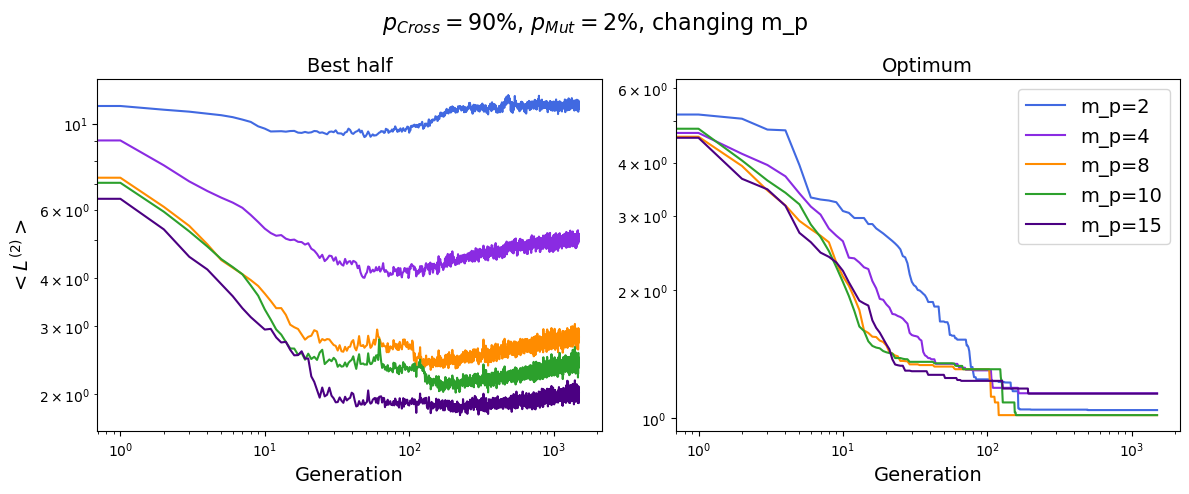

In [676]:
plt.figure(figsize=(12,5))

colors =['royalblue', 'blueviolet', 'darkorange', 'tab:green', 'indigo']

plt.subplot(1,2,1)
h=0
for i in [2,4,8,10,15]:
    filename = f'./9.1/resultsSquarep{i}.txt'
    loss = np.loadtxt(filename, usecols=(0))
    labelstring = f'm_p={i}'
    plt.plot(loss, label=labelstring, color=colors[h])
    h+=1
    
plt.xlabel('Generation', fontsize=14)
plt.ylabel('$<L^{(2)}>$', fontsize=14)
plt.title('Best half', fontsize=14)
plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
h=0
for i in [2,4,8,10,15]:
    filename = f'./9.1/optimumLossp{i}.txt'
    loss = np.loadtxt(filename, usecols=(0,1))
    labelstring = f'm_p={i}'
    plt.plot(loss[:,1], label=labelstring, color=colors[h])
    h+=1
    
plt.xlabel('Generation', fontsize=14)
plt.title('Optimum', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=14)

plt.suptitle('$p_{Cross}=90\%$, $p_{Mut}=2\%$, changing m_p', fontsize=16)

plt.tight_layout()
plt.show()

The previous plot is very interesting: as the exponent gets higher, the algorithm tends to concentrate over a restricted set of solutions from the beginning, this leads of course to a rapid decrease when considering the fitness of the best half of the population, as they are all siblings of a restricted pool of higly fit individuals. However, if we consider whe optimal solution, this restrictedness may result in a lack of generalization of the solution: the candidate solutions will be on average good but very similar between each other so that we are exploring a "local minimum". A good compromise lies in between: I will use **m_p** = 8.

## Seed robustness

As a good GA algorithm should work regardless of the seed, the following plot shows the optimal solution retrieved with two different seeds

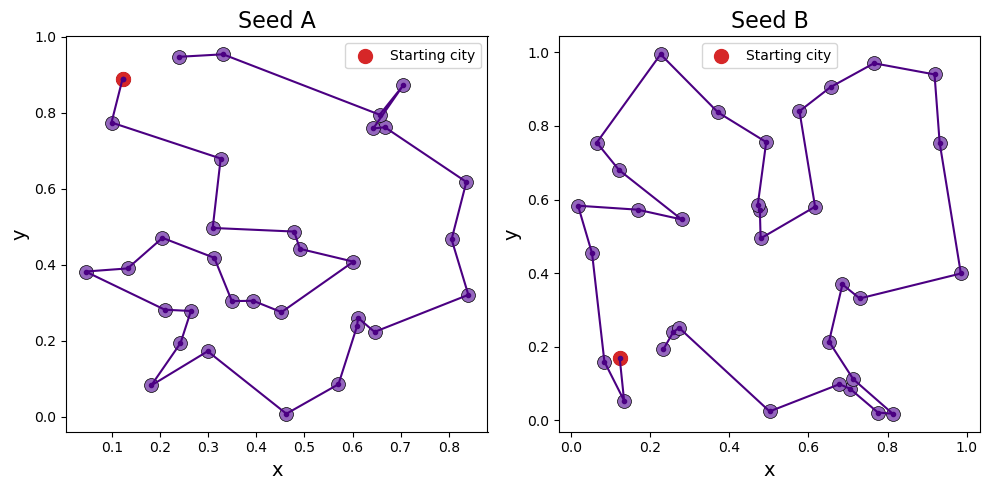

In [793]:
citiesSquareSeed1= np.loadtxt('./9.1/CitiesSquareSEED1.txt', usecols=(0, 1))
pathSquareSeed1 = np.loadtxt('./9.1/pathsSquareSEED1.txt', usecols=(0, 1, 2))

citiesSquareSeed0 = np.loadtxt('./9.1/CitiesSquareSEED0.txt', usecols=(0, 1))
pathSquareSeed0 = np.loadtxt('./9.1/pathsSquareSEED0.txt', usecols=(0, 1, 2))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
frame = pathSquareSeed0[pathSquareSeed0[:, 0] == 1475]
plt.plot(frame[:, 1], frame[:, 2],'o-', mfc='indigo',ms=3, color='indigo')
plt.scatter(citiesSquareSeed0[:, 0], citiesSquareSeed0[:, 1], color='tab:purple', s=100, linewidths=0.5, edgecolors='black')
plt.scatter(citiesSquareSeed0[0, 0], citiesSquareSeed0[0, 1], c='tab:red', s=100, label='Starting city')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Seed A', fontsize=16)
plt.legend()
#plt.gca().set_aspect('equal')
    
plt.subplot(1,2,2)
frame = pathSquareSeed1[pathSquareSeed1[:, 0] == i]
plt.plot(frame[:, 1], frame[:, 2],'o-', mfc='indigo',ms=3, color='indigo')
plt.scatter(citiesSquareSeed1[:, 0], citiesSquareSeed1[:, 1], color='tab:purple', s=100, linewidths=0.5, edgecolors='black')
plt.scatter(citiesSquareSeed1[0, 0], citiesSquareSeed1[0, 1], c='tab:red', s=100, label='Starting city')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Seed B', fontsize=16)
plt.legend()
#plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

## Circle square example

In the following plots, results are shown for two examples: on the left the solution corvergence for points distributed on a circle, on the right for points within a square.

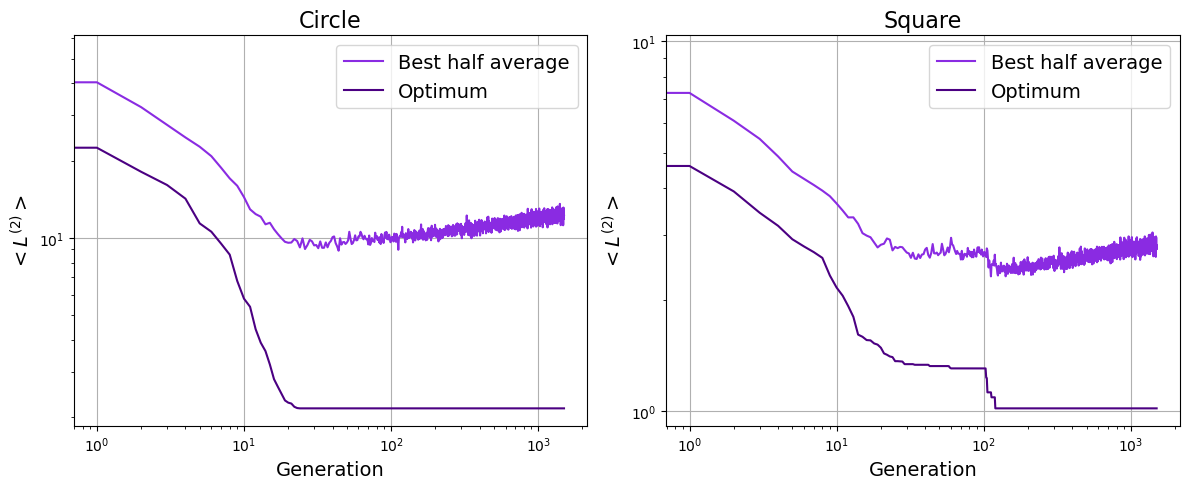

In [788]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
loss = np.loadtxt('./9.1/resultsCircle.txt', usecols=(0))
plt.plot(loss, label='Best half average', color='blueviolet')
optimumLoss = np.loadtxt('./9.1/optimumLossCircle.txt', usecols=(0,1))
plt.plot(optimumLoss[:,0], optimumLoss[:,1], label='Optimum', color='indigo')
plt.xlabel('Generation', fontsize=14)
plt.ylabel('$<L^{(2)}>$', fontsize=14)
plt.title('Circle', fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=14)
plt.grid()

plt.subplot(1,2,2)
loss = np.loadtxt('./9.1/resultsSquare.txt', usecols=(0))
plt.plot(loss, label='Best half average', color='blueviolet')
optimumLoss = np.loadtxt('./9.1/optimumLossSquare.txt', usecols=(0,1))
plt.plot(optimumLoss[:,0], optimumLoss[:,1], label='Optimum', color='indigo')
plt.xlabel('Generation', fontsize=14)
plt.ylabel('$<L^{(2)}>$', fontsize=14)
plt.title('Square', fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

Notably, for the circular points the optimum is reached in a shorter time than what is needed for the square. The following **Animation** remarks this showing a frame with the optimal solution every 25 generations. 

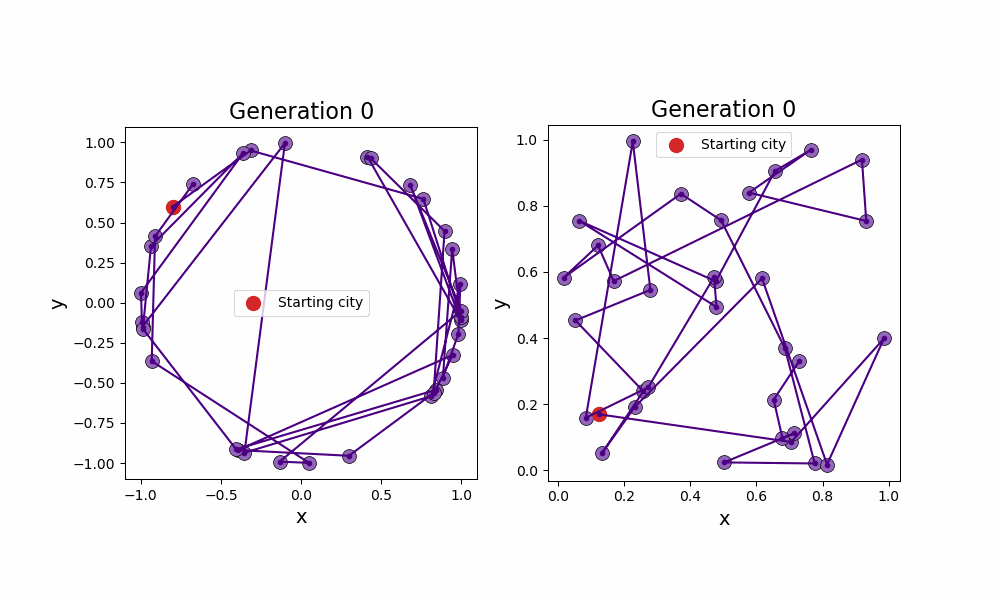

In [783]:
import numpy as np
import io
from PIL import Image
from IPython.display import Image as IPImage
from IPython.display import display

citiesCircle = np.loadtxt('./9.1/CitiesCircle.txt', usecols=(0, 1))
pathCircle = np.loadtxt('./9.1/pathsCircle.txt', usecols=(0, 1, 2))

citiesSquare = np.loadtxt('./9.1/CitiesSquare.txt', usecols=(0, 1))
pathSquare = np.loadtxt('./9.1/pathsSquare.txt', usecols=(0, 1, 2))

frames = []  # List to store individual frames

for i in range(0, 1476, 25):
    # Extract the frame from the data
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    frame = pathCircle[pathCircle[:, 0] == i]
    plt.plot(frame[:, 1], frame[:, 2],'o-', mfc='indigo',ms=3, color='indigo')
    plt.scatter(citiesCircle[:, 0], citiesCircle[:, 1], color='tab:purple', s=100, linewidths=0.5, edgecolors='black')
    plt.scatter(citiesCircle[0, 0], citiesCircle[0, 1], c='tab:red', s=100, label='Starting city')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title(f'Generation {i}', fontsize=16)
    plt.legend()
    plt.gca().set_aspect('equal')
    
    plt.subplot(1,2,2)
    frame = pathSquare[pathSquare[:, 0] == i]
    plt.plot(frame[:, 1], frame[:, 2],'o-', mfc='indigo',ms=3, color='indigo')
    plt.scatter(citiesSquare[:, 0], citiesSquare[:, 1], color='tab:purple', s=100, linewidths=0.5, edgecolors='black')
    plt.scatter(citiesSquare[0, 0], citiesSquare[0, 1], c='tab:red', s=100, label='Starting city')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title(f'Generation {i}', fontsize=16)
    plt.legend()
    plt.gca().set_aspect('equal')

    # Convert the plot to PIL Image object
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    frames.append(img)
    plt.close()

# Save the frames as a GIF
animation_path = "animation.gif"
frames[0].save(animation_path, save_all=True, append_images=frames[1:], optimize=False, duration=200, loop=0)

<img src="animation.gif"/>

# A cool example

One could even use this simple algorithms with real cities coordinates. The following plot shows it for the 48 capitals which are present in the continental USA.

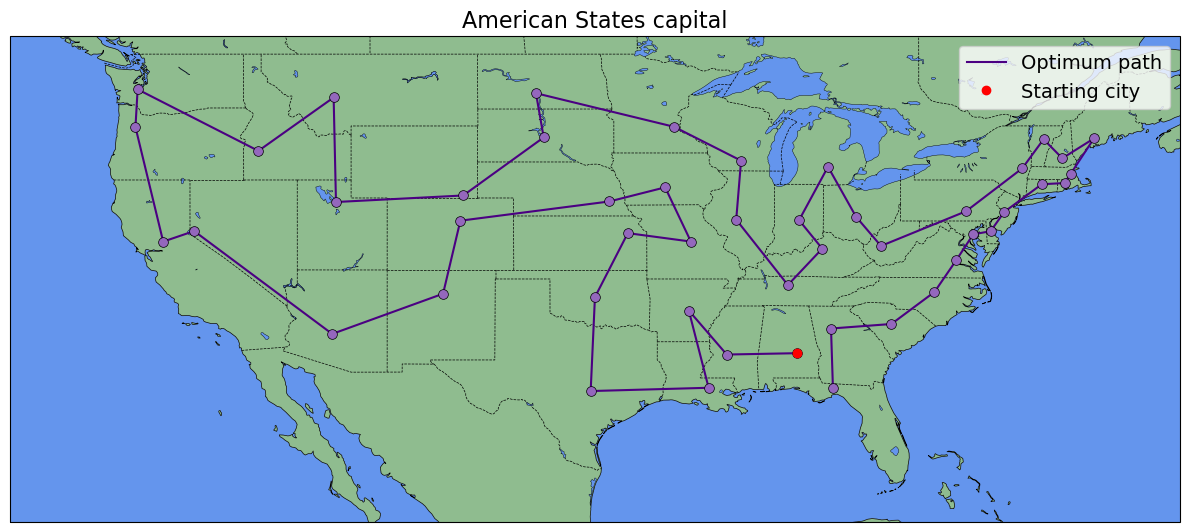

In [800]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read the city coordinates from the file
city_coordinates = {}
with open('American_capitals.dat', 'r') as file:
    next(file)  # Skip the first line
    for line in file:
        name = line.strip().split('\t')[0]
        latitude = line.strip().split()[-1]
        longitude = line.strip().split()[-2]
        city_coordinates[name] = (float(longitude), float(latitude))
        

# Create a Cartopy map of the United States
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -65, 23, 50], crs=ccrs.PlateCarree())

#Load the solution I found through GA
path = np.loadtxt('./9.1/pathsCapitals.txt', usecols=(0, 1, 2))
lastPath=path[path[:,0]==2975]

#Add states borders
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Add map features
ax.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
ax.add_feature(cfeature.LAND, facecolor='darkseagreen')
ax.add_feature(cfeature.COASTLINE, color='black', lw=0.5)
ax.add_feature(cfeature.BORDERS, ls='--', lw=0.5)
ax.add_feature(cfeature.LAKES, edgecolor='black',facecolor='cornflowerblue', linewidth=0.3)
ax.add_feature(states_provinces, ls='--', lw=0.5)

#plot path
ax.plot(lastPath[:,1],lastPath[:,2], color='indigo', label='Optimum path')

# Plot the cities on the map
for city, (lon, lat) in city_coordinates.items():
    ax.plot(lon, lat, 'o', color='tab:purple', mec='black',mew=0.5, markersize=7, transform=ccrs.PlateCarree())


#starting city
(lon,lat) = city_coordinates['Alabama ']
ax.plot(lon, lat, 'ro', label='Starting city')

# Show the map
plt.title('American States capital',fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
         
plt.show()

906.129


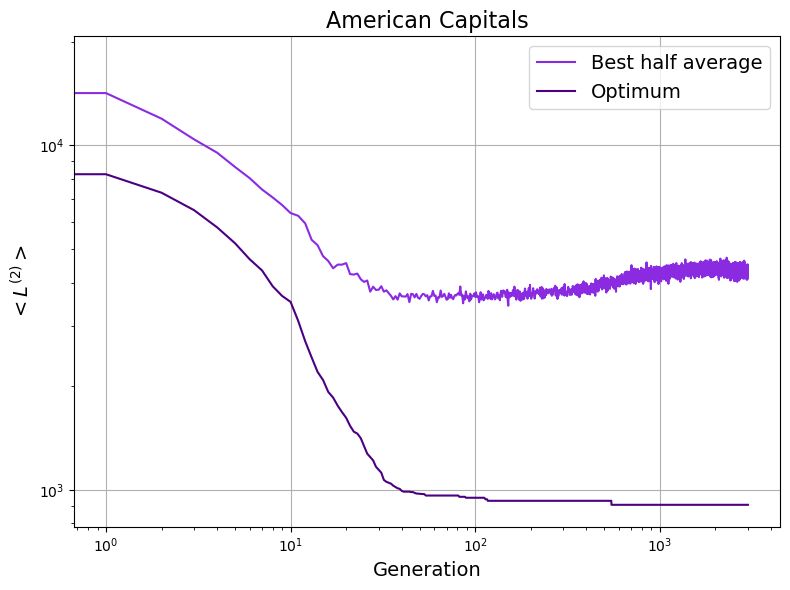

In [801]:
plt.figure(figsize=(8,6))
loss = np.loadtxt('./9.1/resultsCapitals.txt', usecols=(0))
plt.plot(loss, label='Best half average', color='blueviolet')
optimumLoss = np.loadtxt('./9.1/optimumLossCapitals.txt', usecols=(0,1))
plt.plot(optimumLoss[:,0], optimumLoss[:,1], label='Optimum', color='indigo')
plt.xlabel('Generation', fontsize=14)
plt.ylabel('$<L^{(2)}>$', fontsize=14)
plt.title('American Capitals', fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=14)
plt.grid()
print(optimumLoss[-1,1])
plt.tight_layout()
plt.show()